# Credit Card Fraud Detection System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
data = pd.read_csv('C:\\Users\\ssc\\Desktop\\Python Credit Card Fraud Detection Project\\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    199 non-null    int64  
 1   V1      199 non-null    float64
 2   V2      199 non-null    float64
 3   V3      199 non-null    float64
 4   V4      199 non-null    float64
 5   V5      199 non-null    float64
 6   V6      199 non-null    float64
 7   V7      199 non-null    float64
 8   V8      199 non-null    float64
 9   V9      199 non-null    float64
 10  V10     199 non-null    float64
 11  V11     199 non-null    float64
 12  V12     199 non-null    float64
 13  V13     199 non-null    float64
 14  V14     199 non-null    float64
 15  V15     199 non-null    float64
 16  V16     199 non-null    float64
 17  V17     199 non-null    float64
 18  V18     199 non-null    float64
 19  V19     199 non-null    float64
 20  V20     199 non-null    float64
 21  V21     199 non-null    float64
 22  V2

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0
mean,64.713568,-0.236384,0.158756,0.827502,0.364772,-0.049494,0.346774,0.233932,-0.013544,0.019578,...,0.020145,-0.021384,-0.048934,0.056944,0.146139,-0.005455,0.014588,-0.031633,93.352714,0.0
std,35.863565,1.479451,1.359116,1.136474,1.385853,1.272054,1.378823,0.859246,0.732246,0.820054,...,0.469974,0.626027,0.449990,0.604931,0.413064,0.508815,0.386884,0.307675,321.084247,0.0
min,0.000000,-6.093248,-12.114213,-5.694973,-4.515824,-6.631951,-2.145673,-2.705393,-3.807864,-2.094011,...,-0.923604,-2.776923,-3.553381,-1.688158,-1.120892,-1.243924,-2.377933,-1.648553,0.750000,0.0
25%,35.000000,-0.917862,-0.123737,0.184456,-0.469915,-0.615316,-0.514728,-0.157715,-0.174769,-0.395062,...,-0.200197,-0.469191,-0.164320,-0.370921,-0.099667,-0.330936,-0.050706,-0.046030,6.605000,0.0
50%,68.000000,-0.378602,0.254240,0.863585,0.519507,-0.110459,-0.027353,0.154092,0.048456,-0.042934,...,-0.042142,-0.000235,-0.050125,0.129561,0.156732,-0.090685,0.020337,0.019911,20.530000,0.0
75%,92.500000,1.108861,0.845177,1.531536,1.221565,0.427607,0.495493,0.642855,0.276433,0.334165,...,0.102520,0.345747,0.073547,0.439519,0.472891,0.214745,0.088053,0.062731,67.635000,0.0
max,131.000000,1.492936,4.847323,3.562770,4.075817,3.281972,5.122103,4.808426,1.592032,4.009259,...,2.270069,1.461535,2.458589,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,0.0


## Exploratory Data Analysis

In [5]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

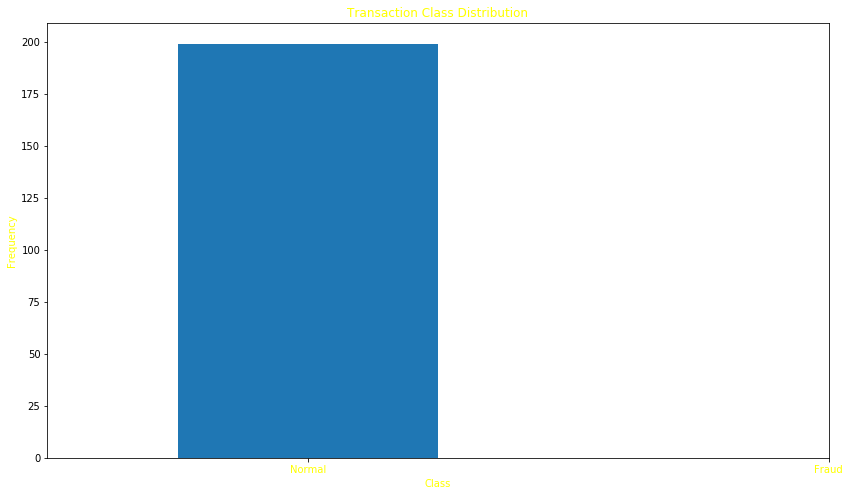

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution",color='Yellow')
plt.xticks(range(2), LABELS,color='Yellow')
plt.xlabel("Class",color='Yellow')
plt.ylabel("Frequency",color='Yellow')

In [7]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [8]:
print(fraud.shape,normal.shape)

(0, 31) (199, 31)


In [9]:
fraud.Amount.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe

<bound method NDFrame.describe of 0      149.62
1        2.69
2      378.66
3      123.50
4       69.99
        ...  
194     10.00
195      8.80
196      5.97
197     15.93
198     10.00
Name: Amount, Length: 199, dtype: float64>

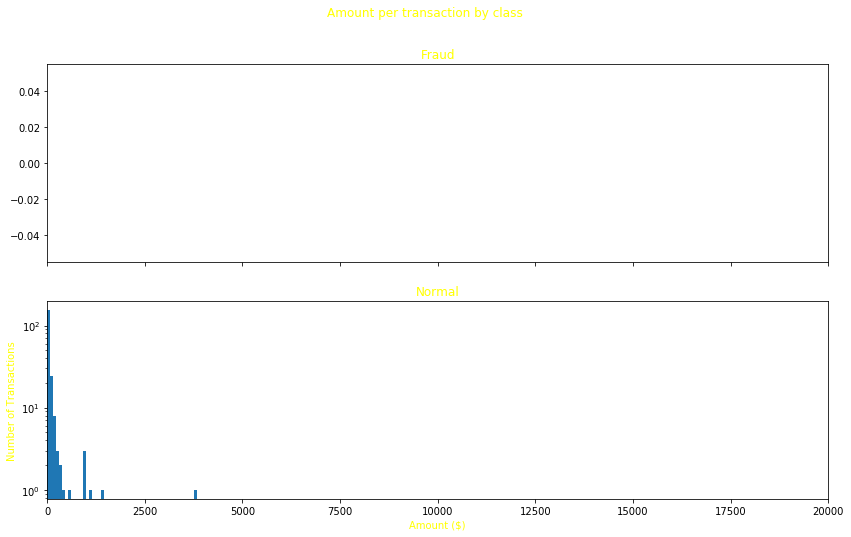

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class',color='Yellow')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud',color='Yellow')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal',color='Yellow')
plt.xlabel('Amount ($)',color="Yellow")
plt.ylabel('Number of Transactions',color='Yellow')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

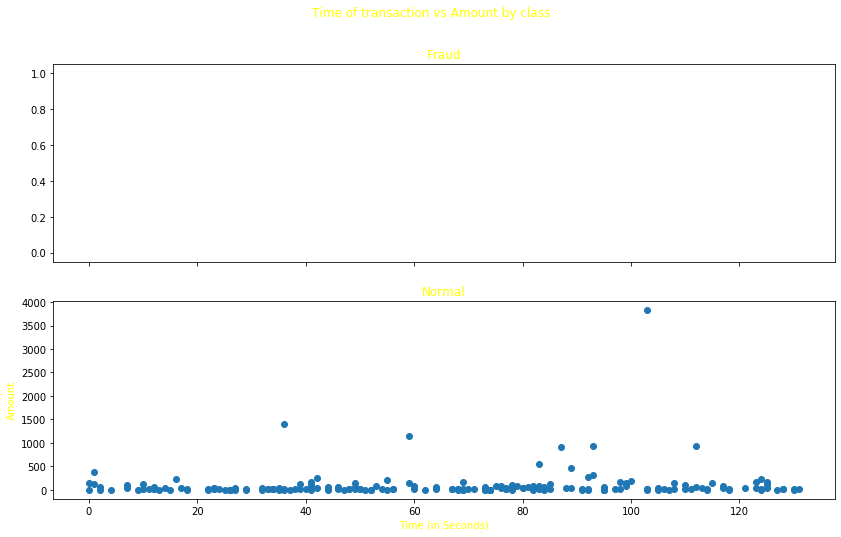

In [12]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class',color='Yellow')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud',color='Yellow')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal',color='Yellow')
plt.xlabel('Time (in Seconds)',color='Yellow')
plt.ylabel('Amount',color='Yellow')
plt.show()

In [13]:
data_frac = data.sample(frac = 0.1, random_state = 1)
data_frac

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
175,112,1.102698,0.103965,0.934479,1.152704,-0.693597,-0.584580,-0.148439,-0.112031,0.196750,...,-0.017211,-0.098781,0.003331,0.394412,0.334208,-0.520700,0.045952,0.048005,54.99,0
40,32,1.249055,-0.624727,-0.710589,-0.991600,1.429973,3.692977,-1.090209,0.967291,0.850149,...,-0.006293,0.009200,-0.129463,1.112970,0.500382,1.196549,-0.048220,0.005094,29.89,0
34,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
90,59,0.921024,-0.162447,-0.094331,0.474084,-0.021486,-0.397506,0.482643,-0.117496,-0.577836,...,-0.209381,-0.930107,0.028510,0.032682,0.155130,0.133250,-0.073534,0.022349,149.90,0
145,91,-1.822273,1.235336,-0.307804,-1.821824,2.762482,3.641499,-0.344614,-1.547541,-0.138239,...,2.080848,-1.591888,0.321636,0.889258,0.156445,-0.960611,-0.035302,0.182321,15.89,0
182,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,0
95,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
29,23,1.059387,-0.175319,1.266130,1.186110,-0.786002,0.578435,-0.767084,0.401046,0.699500,...,0.013676,0.213734,0.014462,0.002951,0.294638,-0.395070,0.081461,0.024220,12.99,0
167,106,-0.306311,0.991272,1.414491,0.855244,0.334284,-0.728260,1.058823,-0.469840,-0.534718,...,0.128008,0.580329,-0.202141,0.416114,-0.271834,-0.377567,-0.113644,-0.052283,24.57,0


In [14]:
data_frac.shape

(20, 31)

In [15]:
data.shape

(199, 31)

In [16]:
Fraud = data_frac[data_frac['Class']==1]
Valid = data_frac[data_frac['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid)) 

In [17]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))


0.0
Fraud Cases : 0
Valid Cases : 20


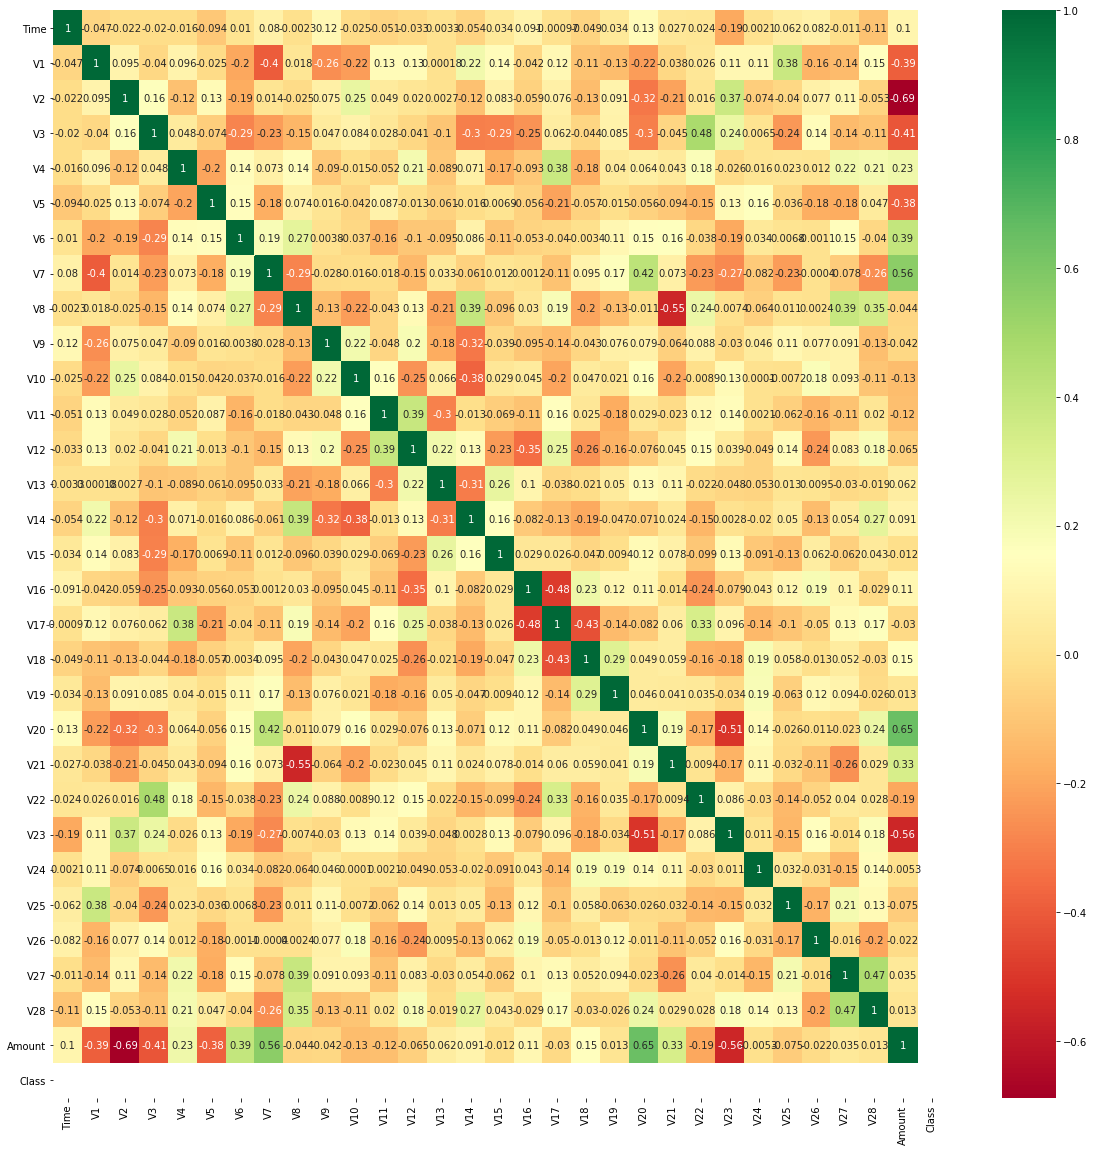

In [18]:
#Correlation
corrmat = data_frac.corr()

top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

#Plotting of Heat Map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
columns = data_frac.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

#Store the variable we are predicting

target = "Class"

#Defining a random state

state = np.random.RandomState(42)

X = data_frac[columns]

Y = data_frac[target]

X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))

#Printing the shapes of X and Y

print(X.shape)

print(Y.shape)

(20, 30)
(20,)


## Model Prediction

In [20]:
classifier = IsolationForest(n_estimators = 100, max_samples = len(X),contamination = outlier_fraction, random_state = state, verbose=0)


In [21]:
type(classifier)

sklearn.ensemble._iforest.IsolationForest

In [22]:
import warnings

warnings.filterwarnings("ignore")    

n_outliers = len(Fraud)

#Fitting data and tagging outliers
classifier.fit(X)
scores_prediction = classifier.decision_function(X)
y_pred = classifier.predict(X)
#Reshape the prediction values to 0 for valid transactions, 1 for fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
    
#Running the Classification Metrics 

print("The number of Credit Card fraud cases as per the dataset are:","{}: {}".format(classifier,n_errors),sep=' ')

print()

print("Accuracy Score:", accuracy_score(Y,y_pred), sep=' ')
    
print()
    
print("Accuracy Percentage of the Machine Learning Model:", accuracy_score(Y,y_pred)*100, sep=' ')

print()

print("                       Classification Report                       ")
    
print()
    
print(classification_report(Y,y_pred))    

The number of Credit Card fraud cases as per the dataset are: IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.0,
                max_features=1.0, max_samples=20, n_estimators=100, n_jobs=None,
                random_state=RandomState(MT19937) at 0x22702A3B268, verbose=0,
                warm_start=False): 0

Accuracy Score: 1.0

Accuracy Percentage of the Machine Learning Model: 100.0

                       Classification Report                       

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

